# **Crime Analysis and Prediction Using Machine Learning Models**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


This dataset is downloaded from https://data.lacity.org/Public-Safety/Crime-Data-from-2020-to-Present/2nrs-mtv8 which reflects incidents of crime in the City of Los Angeles dating back to 2020.

## **Importing Data**

In [4]:
#Import Libraries
!pip install plotnine
from plotnine import *
theme_set(theme_gray())
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from plotnine import *
%matplotlib inline

## **Loading the Dataset**

In [5]:
#Load in the dataset into a pandas dataframe, print statistics
crime= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project /Crime_Data_from_2020_to_Present_20231031.csv')
crime.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,10304468,1/8/2020 0:00,1/8/2020 0:00,2230,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,...,AO,Adult Other,624.0,NaN,NaN,NaN,1100 W 39TH PL,NaN,34.0141,-118.2978
1,190101086,1/2/2020 0:00,1/1/2020 0:00,330,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,...,IC,Invest Cont,624.0,NaN,NaN,NaN,700 S HILL ST,NaN,34.0459,-118.2545
2,200110444,04/14/2020 12:00:00 AM,02/13/2020 12:00:00 AM,1200,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,...,AA,Adult Arrest,845.0,NaN,NaN,NaN,200 E 6TH ST,NaN,34.0448,-118.2474
3,191501505,1/1/2020 0:00,1/1/2020 0:00,1730,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),...,IC,Invest Cont,745.0,998.0,NaN,NaN,5400 CORTEEN PL,NaN,34.1685,-118.4019
4,191921269,1/1/2020 0:00,1/1/2020 0:00,415,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,14400 TITUS ST,NaN,34.2198,-118.4468


## **Dataset Analysis**

In [6]:
#view Crime shape
crime.shape

(825212, 28)

In [7]:
#View crime Info
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825212 entries, 0 to 825211
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           825212 non-null  int64  
 1   Date Rptd       825212 non-null  object 
 2   DATE OCC        825212 non-null  object 
 3   TIME OCC        825212 non-null  int64  
 4   AREA            825212 non-null  int64  
 5   AREA NAME       825212 non-null  object 
 6   Rpt Dist No     825212 non-null  int64  
 7   Part 1-2        825212 non-null  int64  
 8   Crm Cd          825212 non-null  int64  
 9   Crm Cd Desc     825212 non-null  object 
 10  Mocodes         711064 non-null  object 
 11  Vict Age        825212 non-null  int64  
 12  Vict Sex        716683 non-null  object 
 13  Vict Descent    716675 non-null  object 
 14  Premis Cd       825202 non-null  float64
 15  Premis Desc     824724 non-null  object 
 16  Weapon Used Cd  287714 non-null  float64
 17  Weapon Des

In [7]:
#View the missing values in the dataset
crime.isna().sum()

DR_NO                  0
Date Rptd              0
DATE OCC               0
TIME OCC               0
AREA                   0
AREA NAME              0
Rpt Dist No            0
Part 1-2               0
Crm Cd                 0
Crm Cd Desc            0
Mocodes           114148
Vict Age               0
Vict Sex          108529
Vict Descent      108537
Premis Cd             10
Premis Desc          488
Weapon Used Cd    537498
Weapon Desc       537498
Status                 0
Status Desc            0
Crm Cd 1              10
Crm Cd 2          764505
Crm Cd 3          823173
Crm Cd 4          825151
LOCATION               0
Cross Street      693343
LAT                    0
LON                    0
dtype: int64

## **Data Cleaning and Pre-Processing**

In [8]:
#assign '1501 Other MO' to missing values for unknown MO
#gotten from MO codes dicument
crime['Mocodes'].fillna('1501 Other MO', inplace=True)

In [9]:
#assign X to missing values for unknown victim sex
crime['Vict Sex'].fillna('X', inplace=True)

In [10]:
#assign X to missing values for unknown Vict Descent
crime['Vict Descent'].fillna('X', inplace=True)

In [11]:
#drop the missing rows for premise description
crime = crime.dropna(subset=['Premis Desc'])

In [12]:
#Assign 500 =  UNKNOWN WEAPON/OTHER WEAPON for missing weapon used cd
crime['Weapon Used Cd'].fillna(500, inplace=True)

In [13]:
#Assign UNKNOWN WEAPON/OTHER WEAPON for missing weapon description
crime['Weapon Desc'].fillna('UNKNOWN WEAPON/OTHER WEAPON', inplace=True)

In [14]:
#drop the column part 1-2 from the dataframe
crime.drop('Part 1-2', axis=1, inplace=True)
#drop the column Crm Cd 1
crime.drop('Crm Cd 1', axis=1, inplace=True)
#drop the column Crm Cd 2
crime.drop('Crm Cd 2', axis=1, inplace=True)
#drop the column Crm Cd 3
crime.drop('Crm Cd 3', axis=1, inplace=True)
#drop the column Crm Cd 4
crime.drop('Crm Cd 4', axis=1, inplace=True)

In [15]:
#assign none to missing values for unknown Cross Street
crime['Cross Street'].fillna('None', inplace=True)

In [16]:
crime.isna().sum()

DR_NO             0
Date Rptd         0
DATE OCC          0
TIME OCC          0
AREA              0
AREA NAME         0
Rpt Dist No       0
Crm Cd            0
Crm Cd Desc       0
Mocodes           0
Vict Age          0
Vict Sex          0
Vict Descent      0
Premis Cd         0
Premis Desc       0
Weapon Used Cd    0
Weapon Desc       0
Status            0
Status Desc       0
LOCATION          0
Cross Street      0
LAT               0
LON               0
dtype: int64

In [19]:
#Change time datatype to integer
#separate Year, month, date from the date crime occured
crime['Date Rptd'] = pd.to_datetime(crime['Date Rptd'])
crime['Year'] = crime['Date Rptd'].dt.year
crime['Month'] = crime['Date Rptd'].dt.month
crime['Day'] = crime['Date Rptd'].dt.day

In [20]:
crime.head(5)

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Crm Cd,Crm Cd Desc,Mocodes,...,Weapon Desc,Status,Status Desc,LOCATION,Cross Street,LAT,LON,Year,Month,Day
0,10304468,2020-01-08,1/8/2020 0:00,2230,3,Southwest,377,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",AO,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978,2020,1,8
1,190101086,2020-01-02,1/1/2020 0:00,330,1,Central,163,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,700 S HILL ST,None,34.0459,-118.2545,2020,1,2
2,200110444,2020-04-14,02/13/2020 12:00:00 AM,1200,1,Central,155,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,UNKNOWN WEAPON/OTHER WEAPON,AA,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474,2020,4,14
3,191501505,2020-01-01,1/1/2020 0:00,1730,15,N Hollywood,1543,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019,2020,1,1
4,191921269,2020-01-01,1/1/2020 0:00,415,19,Mission,1998,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",329,...,UNKNOWN WEAPON/OTHER WEAPON,IC,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468,2020,1,1


## **Feature Engineering**

In [22]:
#rename column
new_column_names = {'Date Rptd': 'date_rptd',
                    'DATE OCC': 'date_occ',
                    'TIME OCC': 'time_occ',
                    'AREA NAME': 'area_name',
                    'Rpt Dist No': 'rpt_dist_no',
                    'Crm Cd': 'crm_cd',
                    'Crm Cd Desc': 'crm_cd_desc',
                    'Vict Age': 'vict_age',
                    'Vict Sex': 'vict_sex',
                    'Vict Descent': 'vict_descent',
                    'Premis Cd': 'premis_cd',
                    'Premis Desc': 'premis_desc',
                    'Weapon Used Cd': 'weapon_used_cd',
                    'Weapon Desc': 'weapon_desc',
                    'Status Desc': 'status_desc',
                    'Cross Street': 'cross_street'
                   }

crime.rename(columns=new_column_names, inplace=True)


In [23]:
#Assign Categories based on UCR reporting
# Define the crime code categories
# Based on UCR REPORTING – Return A (Based on date of reporting) in pdf file UCR.COMPSTAT062618
HOMICIDE = [110, 113]
RAPE = [121, 122, 815, 820, 821]
ROBBERY = [210, 220]
AGG_ASSAULTS = [230, 231, 235]
DOMESTIC_VIOLENCE = [626, 627, 647, 763, 928, 930, 236, 250, 251, 761, 926]
SIMPLE_ASSAULT = [435, 436, 437, 622, 623, 624, 625]
BURGLARY = [310, 320]
MVT = [510, 520, 433]
BTFV = [330, 331, 410, 420, 421]
PERSONAL_THFT = [350, 351, 352, 353, 450, 451, 452, 453]


# Define a function to map crime codes to categories
def map_category(code):
    if code in HOMICIDE:
        return 'HOMICIDE'
    elif code in RAPE:
        return 'RAPE'
    elif code in ROBBERY:
        return 'ROBBERY'
    elif code in AGG_ASSAULTS:
        return 'AGG.ASSAULTS'
    elif code in DOMESTIC_VIOLENCE:
        return 'Domestic.Violence'
    elif code in SIMPLE_ASSAULT:
        return 'SIMPLE.ASSAULT'
    elif code in BURGLARY:
        return 'BURGLARY'
    elif code in MVT:
        return 'MVT'
    elif code in BTFV:
        return 'BTFV'
    elif code in PERSONAL_THFT:
        return 'PERSONAL.THFT'
    else:
        return 'OTHER.THEFT'

# Check if the 'crm_cd' column exists in the DataFrame
if 'crm_cd' in crime.columns:
    # Map the crime codes to categories
    crime['crm_cd'] = crime['crm_cd'].apply(map_category)
else:
    print("The 'Crm Cd' column does not exist in the DataFrame.")

In [24]:
#Feature engineering for crime category (assault or larceny)
# Create a dictionary to map crime codes to crime categories
crime_dict = {
    "BTFV": "Larceny",
    "BURGLARY": "Larceny",
    "ROBBERY": "Larceny",
    "MVT": "Larceny",
    "OTHER.THEFT": "Larceny",
    "PERSONAL.THFT": "Larceny",
    "RAPE": "Assault",
    "AGG.ASSAULTS": "Assault",
    "Domestic.Violence": "Assault",
    "SIMPLE.ASSAULT": "Assault",
    "HOMICIDE": "Unknown"
}

# Define a function to apply the dictionary to the "crm_cd" column
def categorize_crime(crm_cd):
    if crm_cd in crime_dict:
        return crime_dict[crm_cd]
    else:
        return None

# Apply the function to create a new column called "crime_category"
crime["crime_category"] = crime["crm_cd"].apply(categorize_crime)


In [25]:
#Feature Engineering for crime type (violent or Property)
# Create a dictionary to map crime codes to crime types
crime_dict = {
    "BTFV": "Property",
    "MVT": "Property",
    "BURGLARY": "Property",
    "OTHER.THEFT": "Property",
    "PERSONAL.THFT": "Property",
    "HOMICIDE": "Violent",
    "RAPE": "Violent",
    "ROBBERY": "Violent",
    "AGG.ASSAULTS": "Violent",
    "Domestic.Violence": "Violent",
    "SIMPLE.ASSAULT": "Violent"
}

# Define a function to apply the dictionary to the "crm_cd" column
def categorize_crime_type(crm_cd):
    if crm_cd in crime_dict:
        return crime_dict[crm_cd]
    else:
        return None

# Apply the function to create a new column called "crime_type"
crime["crime_type"] = crime["crm_cd"].apply(categorize_crime_type)


In [26]:
#drop the column date_rptd
crime.drop('date_rptd', axis=1, inplace=True)

In [27]:
crime.head(5)

,DR_NO,date_occ,time_occ,AREA,area_name,rpt_dist_no,crm_cd,crm_cd_desc,Mocodes,vict_age,...,status_desc,LOCATION,cross_street,LAT,LON,Year,Month,Day,crime_category,crime_type
0,10304468,1/8/2020 0:00,2230,3,Southwest,377,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0444 0913,36,...,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978,2020,1,8,Assault,Violent
1,190101086,1/1/2020 0:00,330,1,Central,163,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,...,Invest Cont,700 S HILL ST,None,34.0459,-118.2545,2020,1,2,Assault,Violent
2,200110444,02/13/2020 12:00:00 AM,1200,1,Central,155,OTHER.THEFT,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,...,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474,2020,4,14,Larceny,Property
3,191501505,1/1/2020 0:00,1730,15,N Hollywood,1543,OTHER.THEFT,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,...,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019,2020,1,1,Larceny,Property
4,191921269,1/1/2020 0:00,415,19,Mission,1998,OTHER.THEFT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",329,31,...,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468,2020,1,1,Larceny,Property


## **Save Cleaned Dataset**

## **Exploratory Data Analysis**

In [28]:
 # save the DataFrame to a CSV file
crime_data = crime.to_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project /clean_crimedata.csv', index=False)

In [30]:
#Load in the cleaned dataset into a pandas dataframe, print statistics
crime_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project /clean_crimedata.csv', index_col=0)

#make a copy of the dataframe
crime_data_copy = crime_data.copy()
crime_data.head(5)

,date_occ,time_occ,AREA,area_name,rpt_dist_no,crm_cd,crm_cd_desc,Mocodes,vict_age,vict_sex,...,status_desc,LOCATION,cross_street,LAT,LON,Year,Month,Day,crime_category,crime_type
DR_NO,,,,,,,,,,,,,,,,,,,,,
10304468,1/8/2020 0:00,2230,3,Southwest,377,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0444 0913,36,F,...,Adult Other,1100 W 39TH PL,None,34.0141,-118.2978,2020,1,8,Assault,Violent
190101086,1/1/2020 0:00,330,1,Central,163,SIMPLE.ASSAULT,BATTERY - SIMPLE ASSAULT,0416 1822 1414,25,M,...,Invest Cont,700 S HILL ST,None,34.0459,-118.2545,2020,1,2,Assault,Violent
200110444,02/13/2020 12:00:00 AM,1200,1,Central,155,OTHER.THEFT,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,0,X,...,Adult Arrest,200 E 6TH ST,None,34.0448,-118.2474,2020,4,14,Larceny,Property
191501505,1/1/2020 0:00,1730,15,N Hollywood,1543,OTHER.THEFT,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,76,F,...,Invest Cont,5400 CORTEEN PL,None,34.1685,-118.4019,2020,1,1,Larceny,Property
191921269,1/1/2020 0:00,415,19,Mission,1998,OTHER.THEFT,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",329,31,X,...,Invest Cont,14400 TITUS ST,None,34.2198,-118.4468,2020,1,1,Larceny,Property


## **Descriptive Analysis**

In [29]:
crime_data.describe()

,time_occ,AREA,rpt_dist_no,vict_age,premis_cd,weapon_used_cd,LAT,LON,Year,Month,Day
count,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000,824724.000000
mean,1336.017094,10.709468,1117.374153,29.806724,305.748493,452.239957,33.979989,-118.029266,2021.509550,6.304917,15.541261
std,653.829316,6.093957,609.389189,21.775750,216.768290,97.958554,1.785861,6.192073,1.084128,3.329962,8.807744
min,1.000000,1.000000,101.000000,-3.000000,101.000000,101.000000,0.000000,-118.667600,2020.000000,1.000000,1.000000
25%,900.000000,6.000000,621.000000,7.000000,101.000000,400.000000,34.013700,-118.429600,2021.000000,3.000000,8.000000
50%,1415.000000,11.000000,1141.000000,31.000000,203.000000,500.000000,34.058400,-118.321500,2022.000000,6.000000,15.000000
75%,1900.000000,16.000000,1617.000000,45.000000,501.000000,500.000000,34.163000,-118.273900,2022.000000,9.000000,23.000000
max,2359.000000,21.000000,2199.000000,120.000000,971.000000,516.000000,34.334300,0.000000,2023.000000,12.000000,31.000000


In [31]:
# select only numeric columns
numeric_cols = crime_data.select_dtypes(include='number').columns

# calculate the skewness of the numeric columns
crime_data[numeric_cols].skew()

time_occ          -0.430071
AREA               0.011232
rpt_dist_no        0.018158
vict_age           0.121167
premis_cd          0.524788
weapon_used_cd    -2.399595
LAT              -18.901193
LON               19.003523
Year              -0.035005
Month              0.033554
Day                0.027924
dtype: float64

In [31]:
# select only numeric columns
numeric_cols = crime_data.select_dtypes(include='number').columns

# calculate the skewness of the numeric columns
crime_data[numeric_cols].kurtosis()

time_occ           -0.794972
AREA               -1.185829
rpt_dist_no        -1.188843
vict_age           -0.750674
premis_cd          -1.034146
weapon_used_cd      5.170847
LAT               356.651754
LON               359.238242
Year               -1.279202
Month              -1.135499
Day                -1.193119
dtype: float64

<Axes: ylabel='Frequency'>

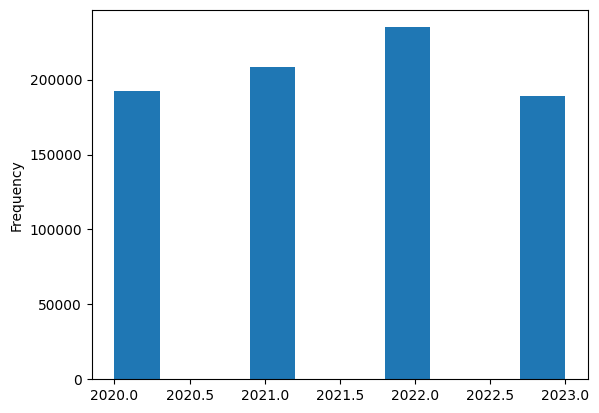

In [32]:
crime_data.Year.plot.hist()

## **Univariate Analysis**

In [33]:
crime_data.crm_cd_desc.value_counts

<bound method IndexOpsMixin.value_counts of DR_NO
10304468                              BATTERY - SIMPLE ASSAULT
190101086                             BATTERY - SIMPLE ASSAULT
200110444            SEX OFFENDER REGISTRANT OUT OF COMPLIANCE
191501505             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
191921269    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
                                   ...                        
231604807    VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...
231606525       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
231210064       ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT
230115220                                           PICKPOCKET
230906458             VANDALISM - MISDEAMEANOR ($399 OR UNDER)
Name: crm_cd_desc, Length: 824724, dtype: object>

In [34]:
crime_data. area_name.value_counts

<bound method IndexOpsMixin.value_counts of DR_NO
10304468       Southwest
190101086        Central
200110444        Central
191501505    N Hollywood
191921269        Mission
                ...     
231604807       Foothill
231606525       Foothill
231210064    77th Street
230115220        Central
230906458       Van Nuys
Name: area_name, Length: 824724, dtype: object>

### **Box Plot for Each Column**

<Axes: >

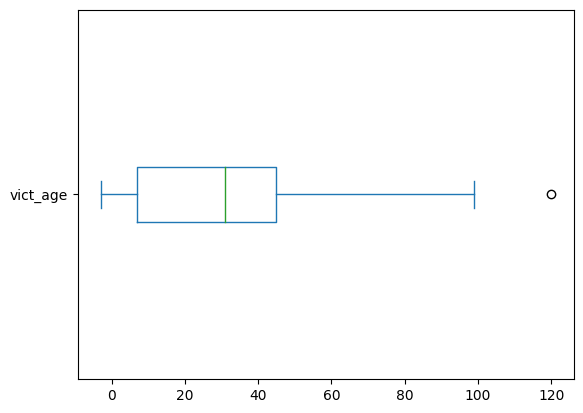

In [35]:
crime_data.vict_age.plot.box(vert=False)


<Axes: >

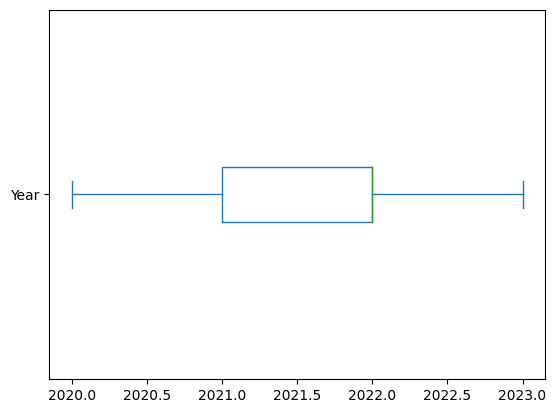

In [38]:
crime_data.Year.plot.box(vert=False)

<Axes: >

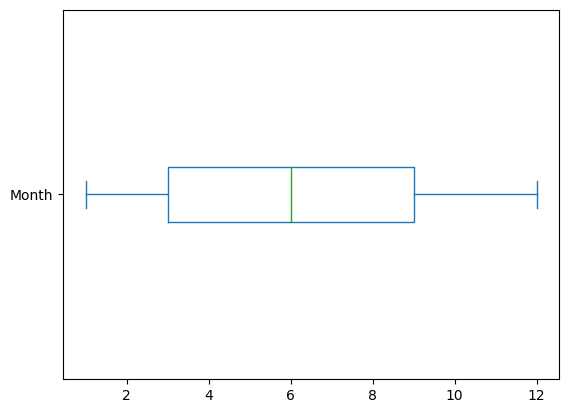

In [41]:
crime_data.Month.plot.box(vert=False)

<Axes: >

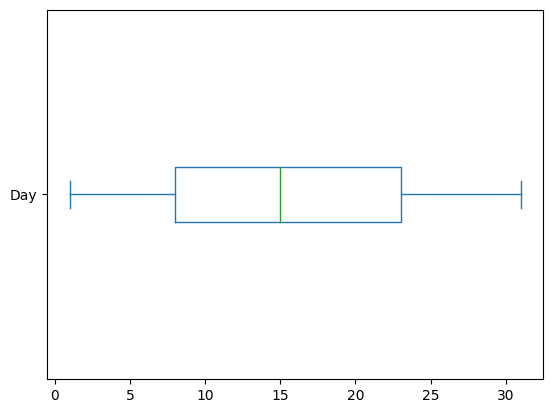

In [42]:
crime_data.Day.plot.box(vert=False)

<Axes: >

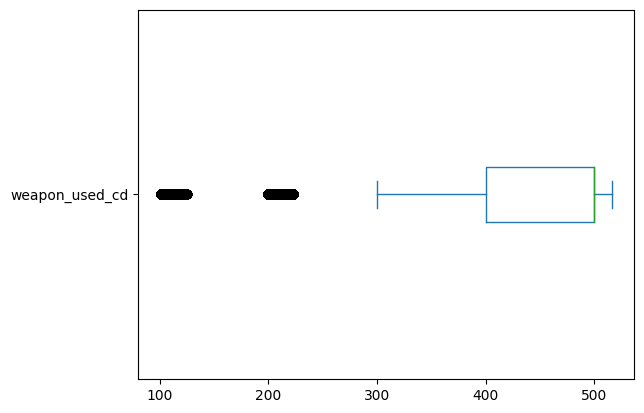

In [43]:
crime_data.weapon_used_cd.plot.box(vert=False)

<Axes: >

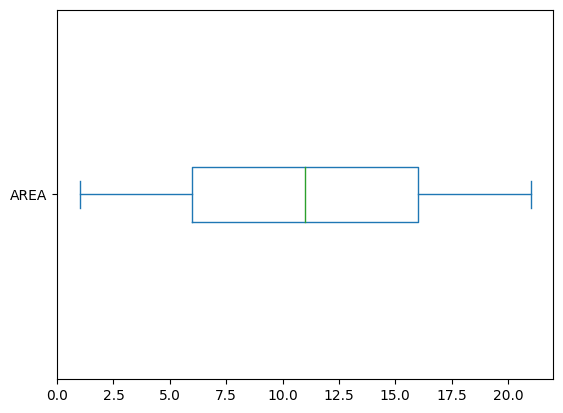

In [44]:
crime_data.AREA.plot.box(vert=False)

<AxesSubplot:>

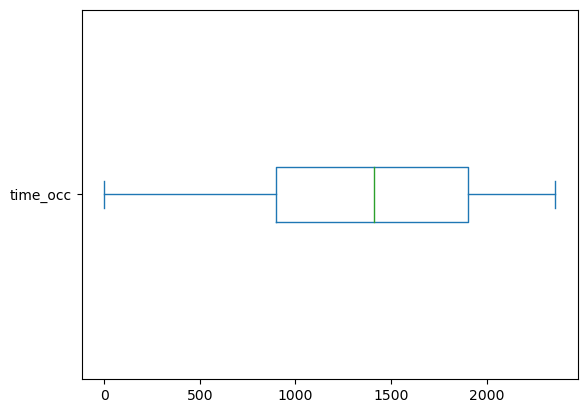

In [ ]:
crime_data.time_occ.plot.box(vert=False)

<AxesSubplot:>

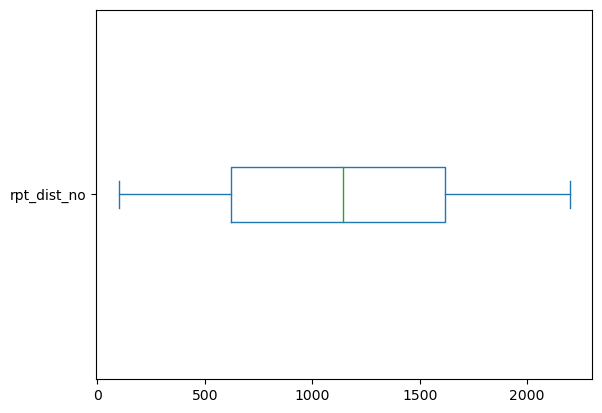

In [ ]:
crime_data.rpt_dist_no.plot.box(vert=False)

## **Bivariate and Multivariate Analysis**

### **Crime occurance based on crime category**

In [45]:
crime_type = crime_data.groupby('crm_cd').size()
print(crime_type)

crm_cd
AGG.ASSAULTS          49020
BTFV                 113783
BURGLARY              53388
Domestic.Violence     89469
HOMICIDE               1414
MVT                   91386
OTHER.THEFT          308805
PERSONAL.THFT          6164
RAPE                   5821
ROBBERY               32555
SIMPLE.ASSAULT        72919
dtype: int64


### **Crime Type Distribution Analysis**

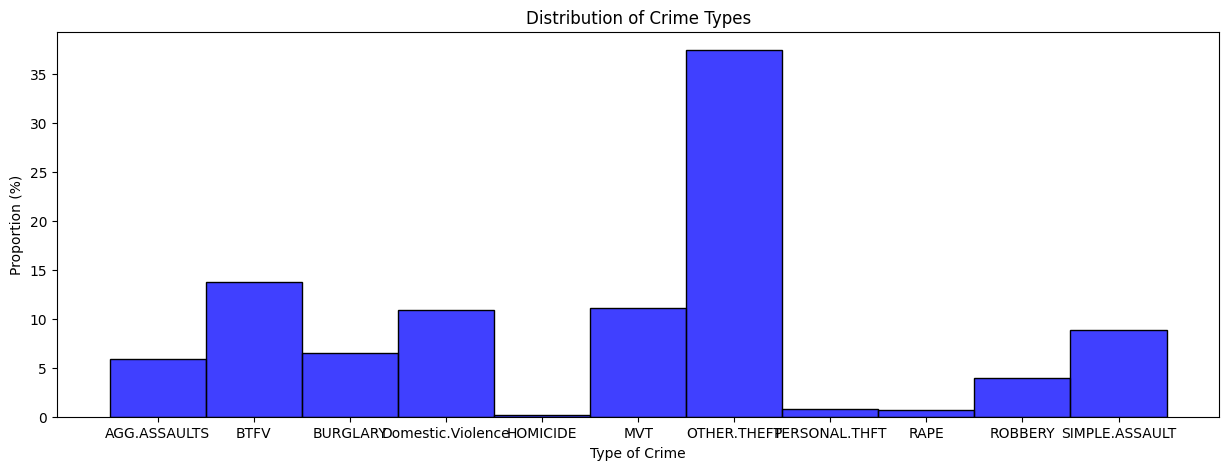

In [46]:
#Type of Crime：Identify the type of crime that occurs the most
crime_grouped = crime_data.groupby("crm_cd").size().reset_index(name="n")
crime_grouped["prop"] = round(crime_grouped["n"]/crime_grouped["n"].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(15, 5))

sns.histplot(data=crime_grouped, x="crm_cd", weights="prop", kde=False, ax=ax, color="blue")

sns.set_style("white")
ax.set_title("Distribution of Crime Types")
ax.set_xlabel("Type of Crime")
ax.set_ylabel("Proportion (%)")

plt.show()

### **Identify the crime category that occurs the most**

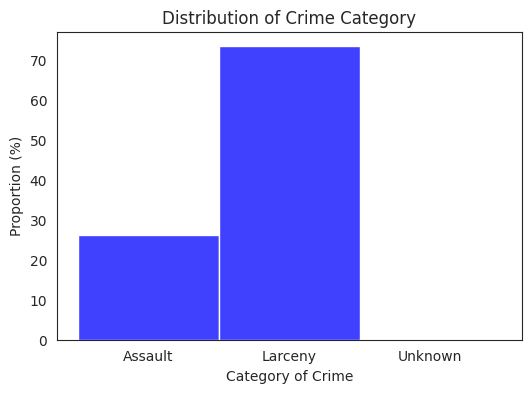

In [47]:
crime_grouped = crime_data.groupby("crime_category").size().reset_index(name="n")
crime_grouped["prop"] = round(crime_grouped["n"]/crime_grouped["n"].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=crime_grouped, x="crime_category", weights="prop", kde=False, ax=ax, color="blue")

sns.set_style("white")
ax.set_title("Distribution of Crime Category")
ax.set_xlabel("Category of Crime")
ax.set_ylabel("Proportion (%)")

plt.show()

### **Crime type that occurs the most**

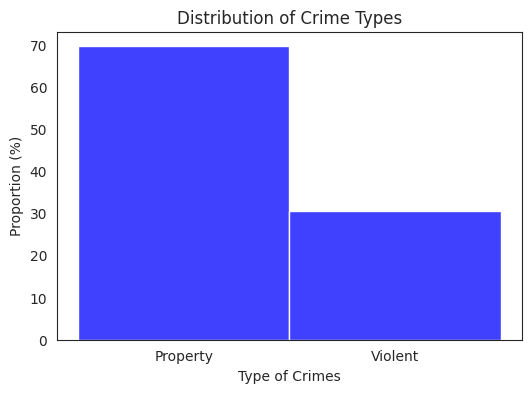

In [48]:
crime_grouped = crime_data.groupby("crime_type").size().reset_index(name="n")
crime_grouped["prop"] = round(crime_grouped["n"]/crime_grouped["n"].sum() * 100, 2)

fig, ax = plt.subplots(figsize=(6, 4))

sns.histplot(data=crime_grouped, x="crime_type", weights="prop", kde=False, ax=ax, color="blue")

sns.set_style("white")
ax.set_title("Distribution of Crime Types")
ax.set_xlabel("Type of Crimes")
ax.set_ylabel("Proportion (%)")

plt.show()
##Other theft account for most of the crime as shown below

### **Count the occurrences of each area name**

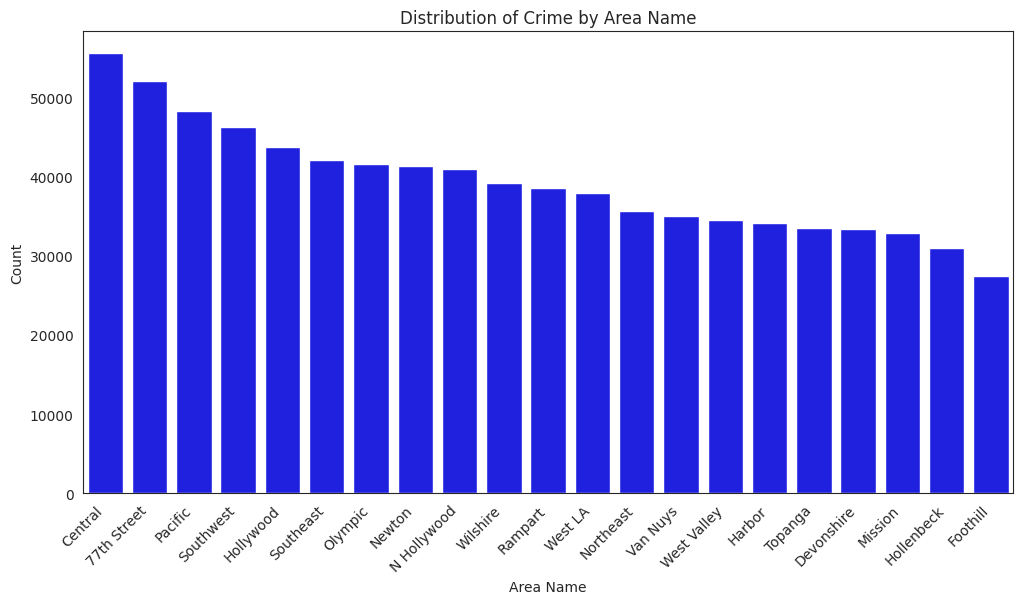

In [49]:
area_counts = crime_data["area_name"].value_counts()

# Create a bar chart to visualize the distribution of area names
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(x=area_counts.index, y=area_counts.values, ax=ax, color="blue")
sns.set_style("white")
ax.set_title("Distribution of Crime by Area Name")
ax.set_xlabel("Area Name")
ax.set_ylabel("Count")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

plt.show()

### **The top ten areas where most crime took place**

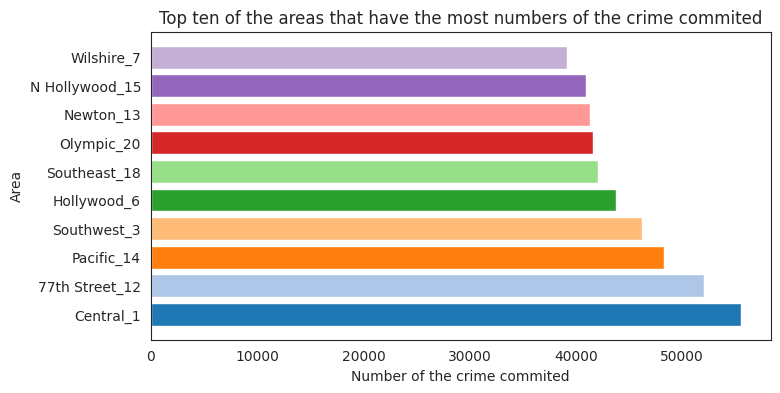

In [50]:
# Find the Top 10 Regions where the most crimes happened
top10 = (crime_data.groupby(['area_name', 'AREA'])
         .size()
         .reset_index(name='n')
         .sort_values(by='n', ascending=False)
         .head(10))

# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
top10['Area'] = top10['area_name'] + '_' + top10['AREA'].astype(str)

# Map each unique area_name to a unique color
color_dict = {area: plt.cm.tab20(i) for i, area in enumerate(top10['area_name'].unique())}

# Map area_name column to colors using the color_dict
colors = [color_dict[area] for area in top10['area_name']]

# Plot the Top 10 Regions
plt.figure(figsize=(8,4))
plt.barh(top10['Area'], top10['n'], color=colors)
plt.title('Top ten of the areas that have the most numbers of the crime commited')
plt.xlabel('Number of the crime commited')
plt.ylabel('Area')
plt.show()

### **Distribution Of Top Ten High Crime Areas and Crime Category**

<Figure size 800x400 with 0 Axes>

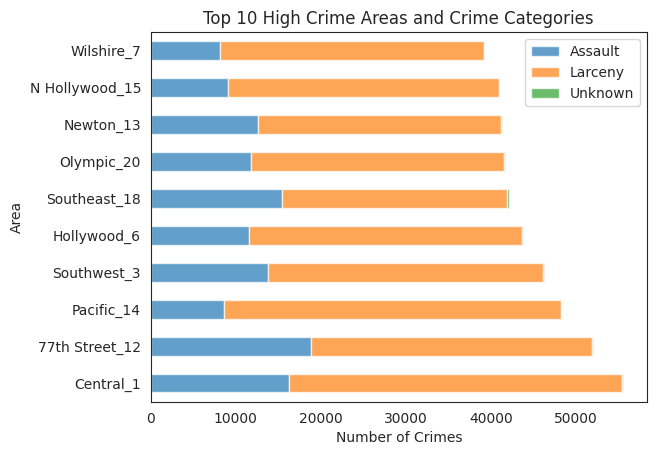

In [51]:
top_10_areas = crime_data['AREA'].value_counts().nlargest(10).index.tolist()

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['AREA'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_category'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_category']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(8, 4))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime Areas and Crime Categories')
plt.legend(loc='upper right')
plt.show()


### **Distribution Of Top Ten High Crime Areas And Crime Types**

<Figure size 800x400 with 0 Axes>

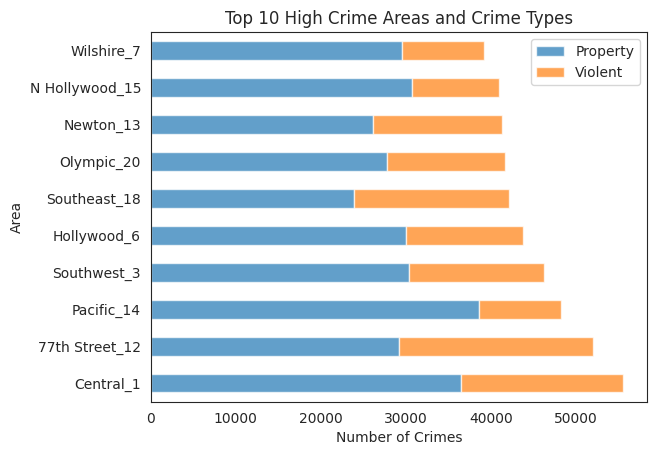

In [52]:
top_10_areas = crime_data['AREA'].value_counts().nlargest(10).index.tolist()

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['AREA'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_type'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_type']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(8, 4))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime Areas and Crime Types')
plt.legend(loc='upper right')
plt.show()

### **The top ten subareas where most crime took place**

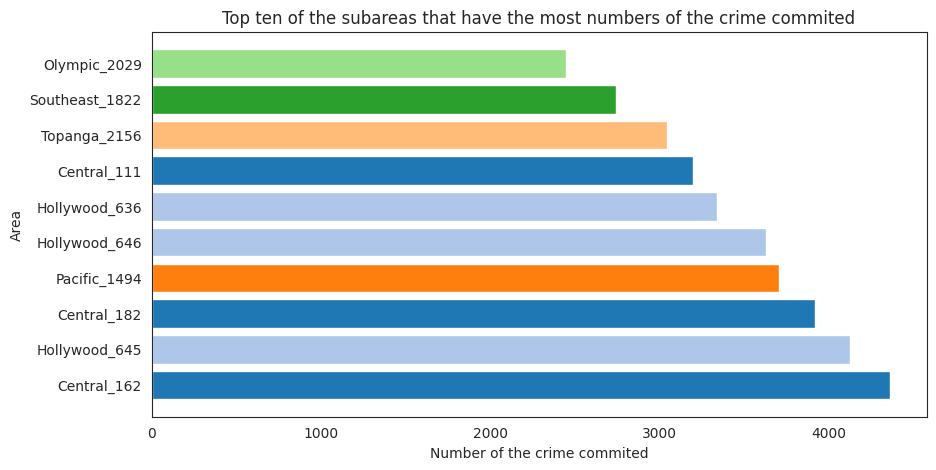

In [53]:
#Location where the crime took place
# Find the Top 10 Regions where the most crimes happened
top10 = (crime_data.groupby(['area_name', 'rpt_dist_no'])
         .size()
         .reset_index(name='n')
         .sort_values(by='n', ascending=False)
         .head(10))

# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
top10['Area'] = top10['area_name'] + '_' + top10['rpt_dist_no'].astype(str)

# Map each unique area_name to a unique color
color_dict = {area: plt.cm.tab20(i) for i, area in enumerate(top10['area_name'].unique())}

# Map area_name column to colors using the color_dict
colors = [color_dict[area] for area in top10['area_name']]

# Plot the Top 10 Regions
plt.figure(figsize=(10,5))
plt.barh(top10['Area'], top10['n'], color=colors)
plt.title('Top ten of the subareas that have the most numbers of the crime commited')
plt.xlabel('Number of the crime commited')
plt.ylabel('Area')
plt.show()

### **The top ten subareas with crime Categories**

<Figure size 1000x600 with 0 Axes>

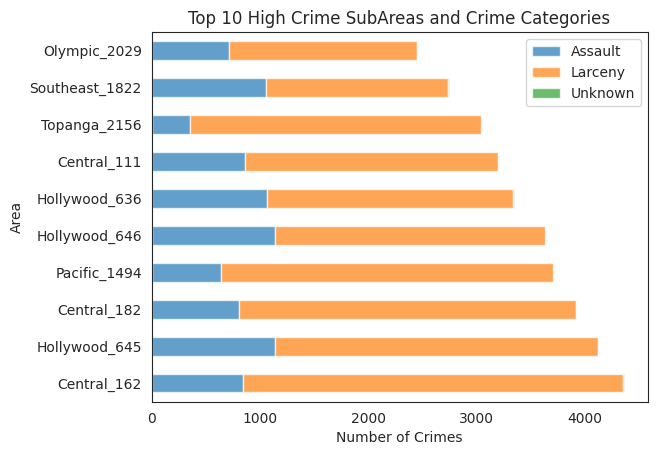

In [54]:
#Location where the crime took place
top_10_areas = crime_data['rpt_dist_no'].value_counts().nlargest(10).index.tolist()


# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['rpt_dist_no'].astype(str)

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
#crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['rpt_dist_no'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_category'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_category']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime SubAreas and Crime Categories')
plt.legend(loc='upper right')
plt.show()

### **The top ten subareas where most crime took place with Crime types**

<Figure size 1000x600 with 0 Axes>

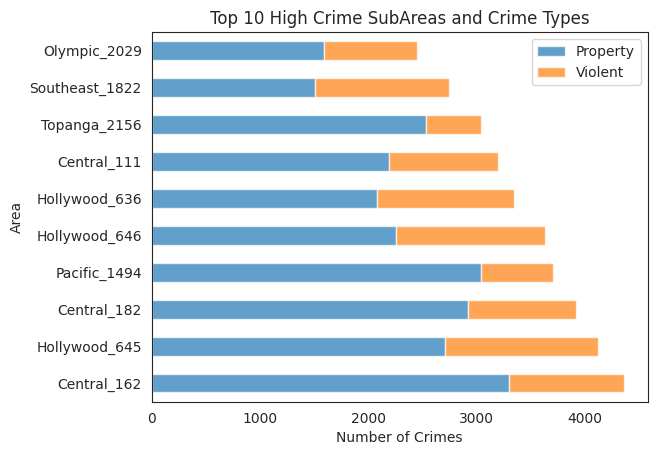

In [55]:
#Location where the crime took place
# Assuming pandas library is imported and crime_data is the data frame
top_10_areas = crime_data['rpt_dist_no'].value_counts().nlargest(10).index.tolist()


# Create a new column 'Area' by concatenating 'AREA NAME' and 'Rpt Dist No'
crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['rpt_dist_no'].astype(str)

# Create a new column 'Area' by concatenating 'area_name' and 'AREA'
#crime_data['Area'] = crime_data['area_name'] + '_' + crime_data['AREA'].astype(str)

crime_in_top_10 = crime_data[crime_data['rpt_dist_no'].isin(top_10_areas)]
crime_categories_in_top_10 = crime_in_top_10['crime_type'].unique().tolist()

crime_counts = crime_in_top_10.groupby(['Area', 'crime_type']).size().unstack()

# Sort the bars in descending order of total crime counts for each area
crime_counts = crime_counts.loc[crime_counts.sum(axis=1).sort_values(ascending=False).index]

plt.figure(figsize=(10, 6))
crime_counts.plot(kind='barh', stacked=True, alpha=0.7)
plt.xlabel('Number of Crimes')
plt.title('Top 10 High Crime SubAreas and Crime Types')
plt.legend(loc='upper right')
plt.show()

### **visualizing the frequency of crimes occurred at different times of the day, with an increasing trend in crime rate as the day progresses**

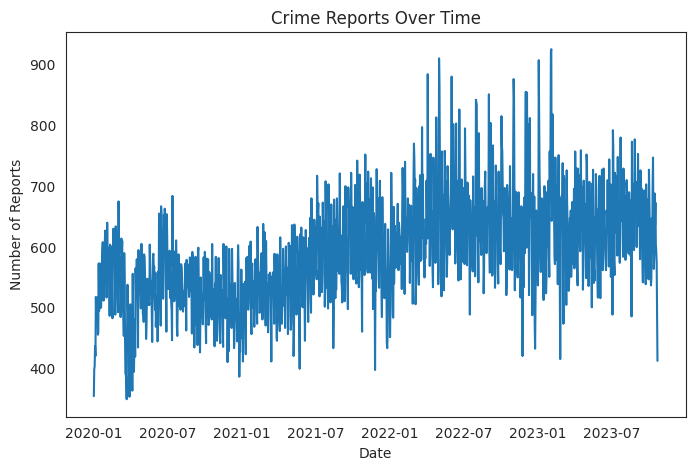

In [56]:
#number of crime reports over time. using timeseries graph
crime_data['Date'] = pd.to_datetime(crime_data[['Year', 'Month', 'Day']])

# Group the crime reports by date and count the number of reports per day
daily_counts = crime_data.groupby('Date').size()

# Plot the daily crime report counts as a time series
plt.figure(figsize=(8, 5))
plt.plot(daily_counts.index, daily_counts.values)
plt.title('Crime Reports Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reports')
plt.show()


### **Get the Crime report by Year**

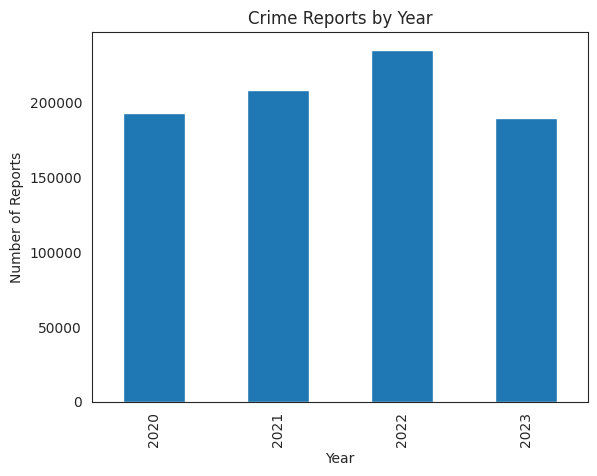

In [57]:
crime_data['Date'] = pd.to_datetime(crime_data[['Year', 'Month', 'Day']])

# Extract the year from the date column and plot a bar plot of the counts
crime_data['Date'].dt.year.value_counts().sort_index().plot(kind='bar')

plt.title('Crime Reports by Year')
plt.xlabel('Year')
plt.ylabel('Number of Reports')
plt.show()


### **Crime report by Month/year**

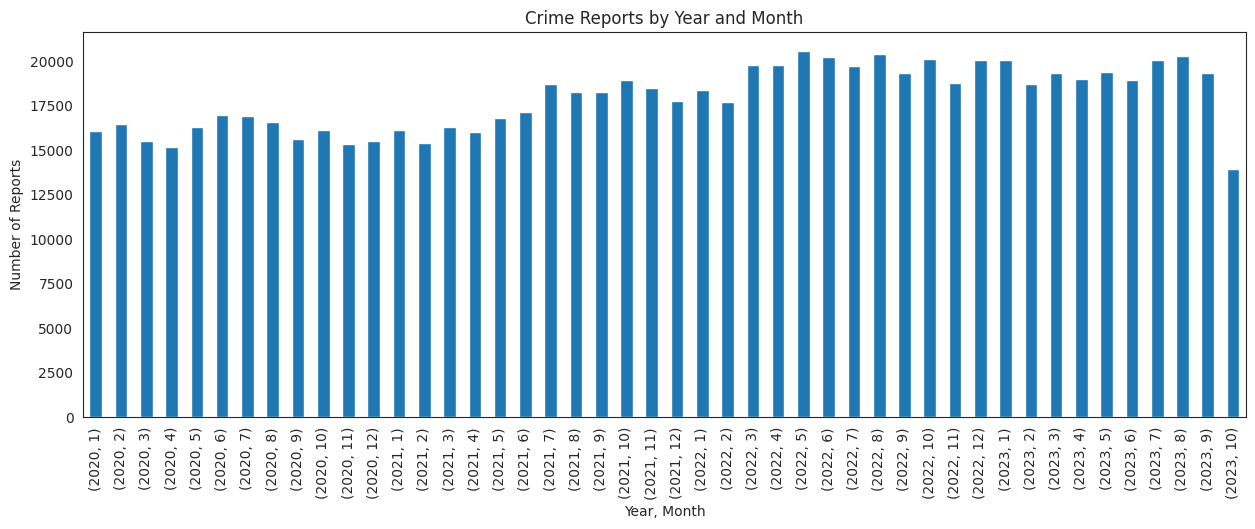

In [58]:
# Assuming the crime_data DataFrame has columns called "Year", "Month", and "Day"
crime_data['Date'] = pd.to_datetime(crime_data[['Year', 'Month', 'Day']])

# Group the crime reports by year and month and count the number of reports per month
monthly_counts = crime_data.groupby([crime_data['Date'].dt.year, crime_data['Date'].dt.month]).size()

# Plot the monthly crime report counts as a bar chart
fig, ax = plt.subplots(figsize=(15, 5))
monthly_counts.plot(kind='bar', ax=ax)
ax.set_title('Crime Reports by Year and Month')
ax.set_xlabel('Year, Month')
ax.set_ylabel('Number of Reports')
plt.show()


### **Crime Occurence by Region and Month 2020**

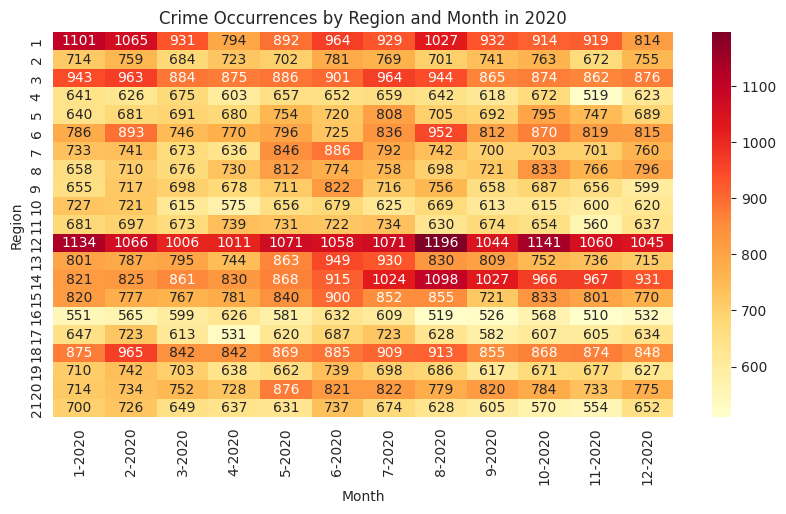

In [59]:
# Filter the data to only include the year 2020
crime_data_2020 = crime_data[crime_data['Year'] == 2020]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2020
crime_data_grouped = crime_data_2020.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2020')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()


### **crime Occurence by Region and Month 2021**

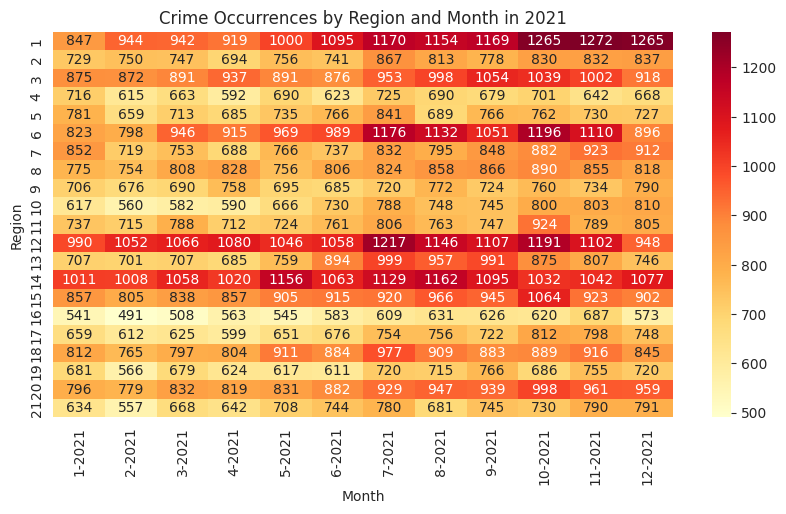

In [60]:
# Filter the data to only include the year 2021
crime_data_2021 = crime_data[crime_data['Year'] == 2021]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2021
crime_data_grouped = crime_data_2021.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2021')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

### **crime Occurence by Region and Month 2022**

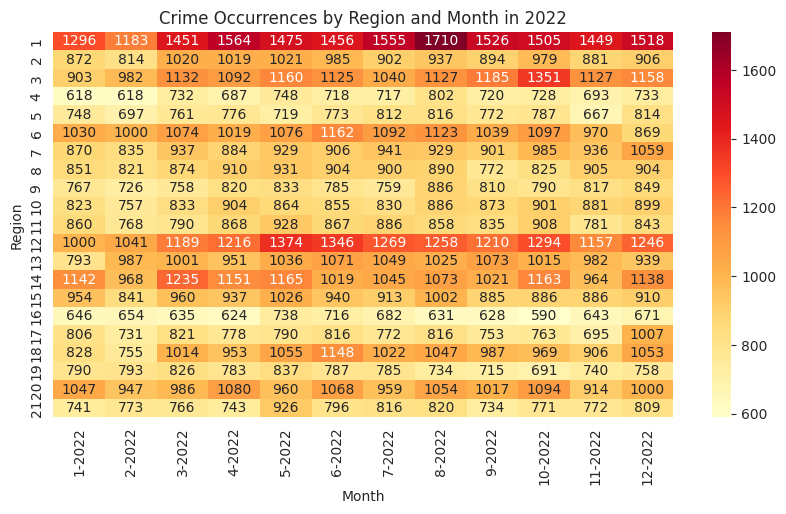

In [61]:
# Filter the data to only include the year 2022
crime_data_2022 = crime_data[crime_data['Year'] == 2022]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2022
crime_data_grouped = crime_data_2022.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2022')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

In [62]:
# Use groupby() and first() methods to get the corresponding AREA for each area_name
area_mapping = crime_data.groupby('area_name')['AREA'].first()

# Print the area_mapping Series
print(area_mapping)

area_name
77th Street    12
Central         1
Devonshire     17
Foothill       16
Harbor          5
Hollenbeck      4
Hollywood       6
Mission        19
N Hollywood    15
Newton         13
Northeast      11
Olympic        20
Pacific        14
Rampart         2
Southeast      18
Southwest       3
Topanga        21
Van Nuys        9
West LA         8
West Valley    10
Wilshire        7
Name: AREA, dtype: int64


### **Filter the data to only include the year 2023**

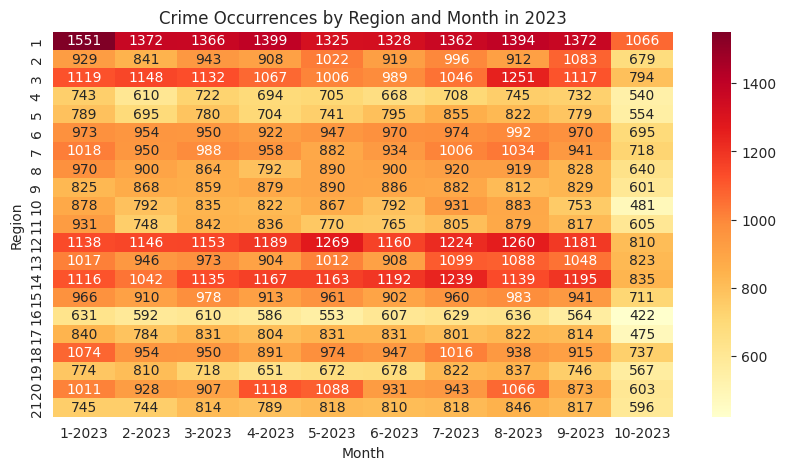

In [63]:
crime_data_2023 = crime_data[crime_data['Year'] == 2023]

# Group the data by region, year, and month to get the total number of crimes in each region for each month and year in 2023
crime_data_grouped = crime_data_2023.groupby(['AREA', 'Year', 'Month', 'crm_cd_desc']).size().reset_index(name='crime_count')

# Plot the data using a heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(crime_data_grouped.pivot_table(values='crime_count', index='AREA', columns=['Month', 'Year'], aggfunc='sum', fill_value=0), cmap='YlOrRd', annot=True, fmt='g')
plt.title('Crime Occurrences by Region and Month in 2023')
plt.xlabel('Month')
plt.ylabel('Region')
plt.show()

In [64]:
crime_data['vict_age'].astype(int)

DR_NO
10304468     36
190101086    25
200110444     0
191501505    76
191921269    31
             ..
231604807    23
231606525    25
231210064    29
230115220    24
230906458    53
Name: vict_age, Length: 824724, dtype: int64

### **distribution of victim ages for different areas**

In [ ]:
#Victim age distribution: this plot allows us to visualize the distribution of victim ages
#in the crime_data dataset, and to identify any patterns or trends in the data.
#We can see how many victims fall into each age range, and whether there are any age
#groups that are overrepresented or underrepresented in the dataset.

#Victim Age by Areas: show the distribution of victim ages across the selected areas.
#each histogram represents a different selected area,
#and the color of each histogram will be based on the selected color palette.

#The purpose of the code is to provide a visual representation of the distribution of victim ages
#across selected areas to help understand the crime data.

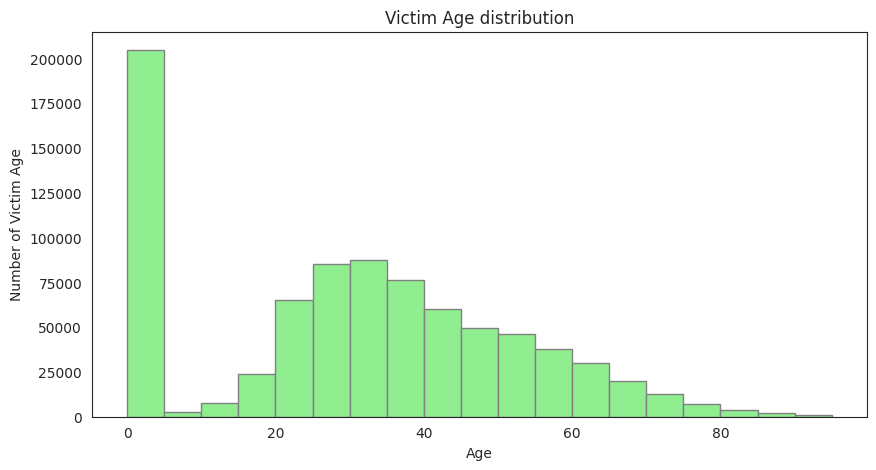

In [77]:
#Victim Age Dsitribution
plt.figure(figsize=(10,5))
plt.hist(crime_data['vict_age'], bins=range(0, 100, 5), color='lightgreen', edgecolor='grey')
plt.title('Victim Age distribution')
plt.xlabel('Age')
plt.ylabel('Number of Victim Age')
plt.show()

In [65]:
#Define the age category from the Vict_age column
def Age_Category(col):
    if (col <= 0):
        return 'Unknown Age'
    elif (col > 0) & (col <= 14):
        return 'Children'
    elif (col >= 15) & (col <= 24):
        return 'Youth'
    elif (col >= 25) & (col <= 64):
        return 'Adult'
    else:
        return 'senior'


In [66]:
#Get the age distribution
age_distribution = crime_data['vict_age'].apply(Age_Category)
age_distribution.value_counts()

Adult          473656
Unknown Age    203578
Youth           88983
senior          46756
Children        11751
Name: vict_age, dtype: int64

### **Bar chart plot to check the age distribution**

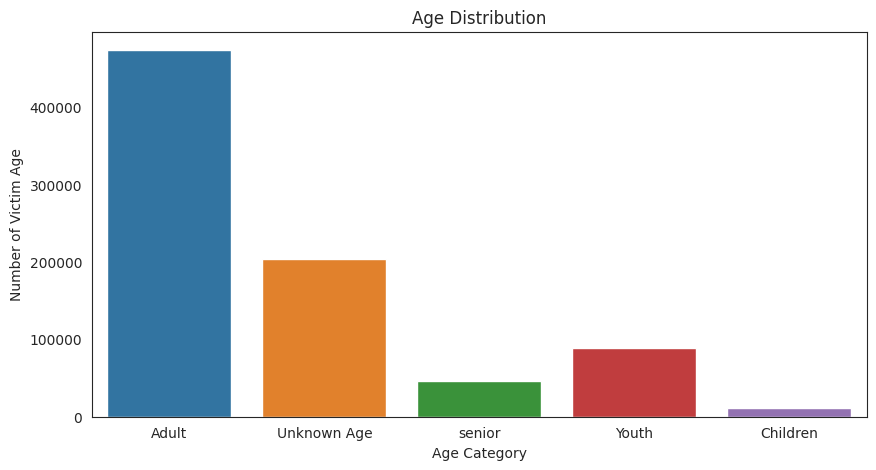

In [67]:
plt.figure(figsize=(10,5))
age_distribution = crime_data['vict_age'].apply(Age_Category)
age_counts = age_distribution.value_counts()

sns.countplot(x=age_distribution)
plt.title('Age Distribution')
plt.xlabel('Age Category')
plt.ylabel('Number of Victim Age')
plt.show()

### **Distribution of Age Category**

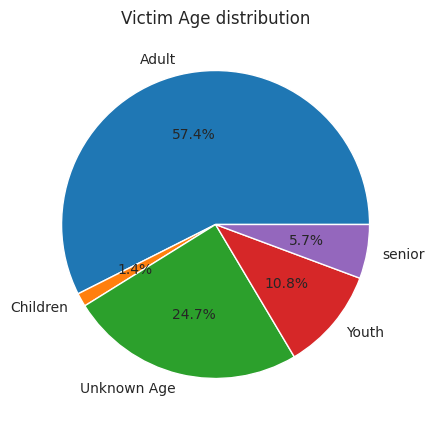

In [69]:
crime_data['Age_Category'] = crime_data['vict_age'].apply(Age_Category)

age_count = crime_data.groupby(['Age_Category', 'area_name']).size().reset_index(name='counts')

age_count.groupby('Age_Category')['counts'].sum().plot(kind='pie', figsize=(10, 5), autopct='%1.1f%%')
plt.title('Victim Age distribution')
plt.ylabel('')
plt.show()

### **the Victim age by Area Distribution**

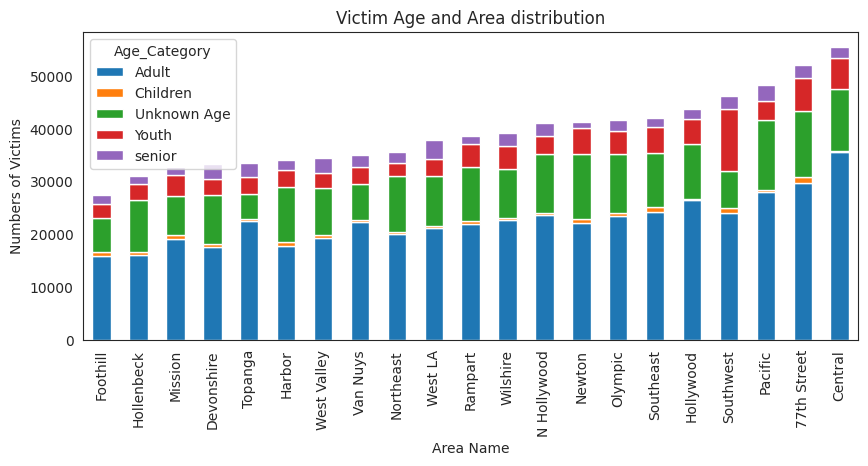

In [70]:
# Calculate the crime count by age category and area name
age_count = crime_data.groupby(['Age_Category', 'area_name']).size().reset_index(name='counts')

# Calculate the total crime count for each area name
total_counts = age_count.groupby('area_name')['counts'].sum().reset_index(name='total_counts')

# Sort the data by total crime count for each area name in ascending order
total_counts = total_counts.sort_values(by='total_counts', ascending=True)

# Use the sorted area names to sort the stacked bars in the plot
sorted_area_names = total_counts['area_name'].tolist()

# Pivot the data to create a stacked bar plot with sorted area names
age_count_pivot = age_count.pivot(index='area_name', columns='Age_Category', values='counts')
age_count_pivot = age_count_pivot.loc[sorted_area_names]
age_count_pivot.plot(kind='bar', stacked=True, figsize=(10, 4))

# Add title and axis labels
plt.title('Victim Age and Area distribution')
plt.xlabel('Area Name')
plt.ylabel('Numbers of Victims')

# Show the plot
plt.show()


### **the Victim Age by Area Distribution in the top 10 Areas**

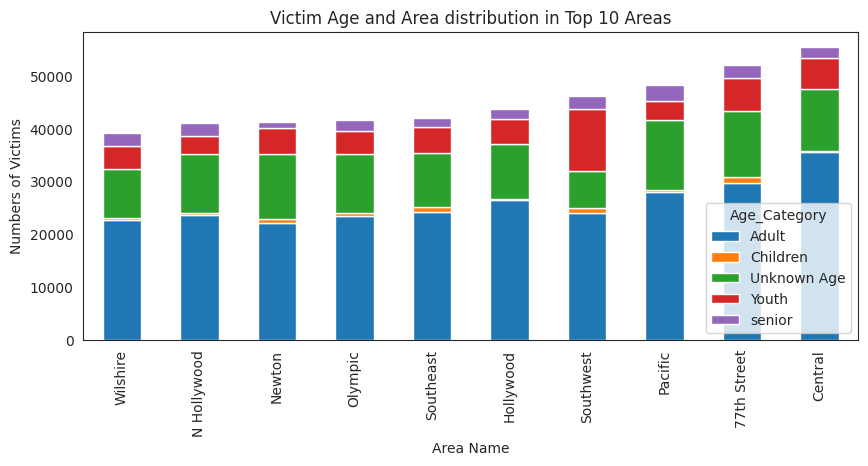

In [71]:
# Calculate the total crime count for each area name
total_counts = age_count.groupby('area_name')['counts'].sum().reset_index(name='total_counts')

# Sort the data by total crime count for each area name in descending order and get top 10 areas
top10_area_names = total_counts.sort_values(by='total_counts', ascending=False).head(10)['area_name'].tolist()

# Filter the age_count dataframe to keep only the top 10 areas
age_count_top10 = age_count[age_count['area_name'].isin(top10_area_names)]

# Use the sorted area names to sort the stacked bars in the plot
sorted_area_names = age_count_top10.groupby('area_name')['counts'].sum().sort_values().index.tolist()

# Pivot the data to create a stacked bar plot with sorted area names
age_count_top10_pivot = age_count_top10.pivot(index='area_name', columns='Age_Category', values='counts')
age_count_top10_pivot = age_count_top10_pivot.loc[sorted_area_names]
age_count_top10_pivot.plot(kind='bar', stacked=True, figsize=(10, 4))

# Add title and axis labels
plt.title('Victim Age and Area distribution in Top 10 Areas')
plt.xlabel('Area Name')
plt.ylabel('Numbers of Victims')

# Show the plot
plt.show()


### **Victim Sex Distribution**

In [72]:
#this plot allows us to visualize the distribution of victim sex in the crime_data dataset,
#and to identify whether there are any imbalances or biases in the data.
#We can see how many victims are male and how many are female,
#and whether there are any other categories of sex that are present in the data.

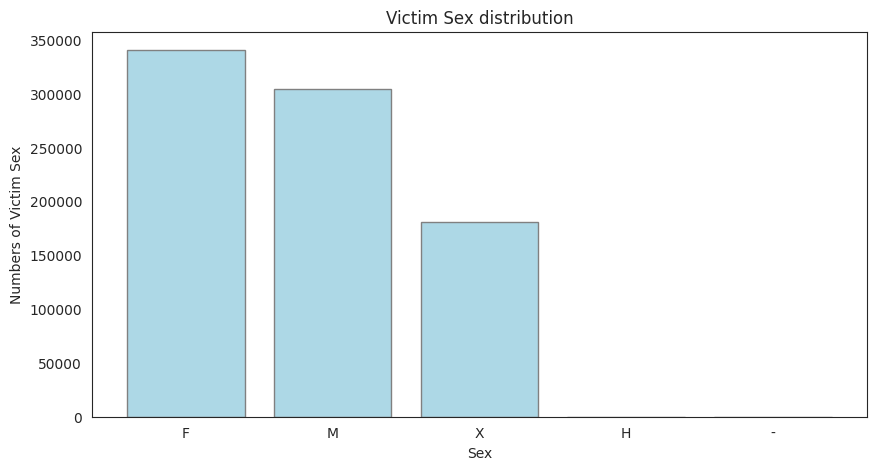

In [73]:
#Get the Victim SEx Distribution
plt.figure(figsize=(10,5))

# Create a bar plot of victim sex distribution
plt.bar(crime_data['vict_sex'].unique(), crime_data['vict_sex'].value_counts(), color='lightblue', edgecolor='grey')

# Add title and axis labels
plt.title('Victim Sex distribution')
plt.xlabel('Sex')
plt.ylabel('Numbers of Victim Sex')

# Display the plot
plt.show()

### **Victim sex distribution by region.**

In [ ]:
#The chart shows that, except for the Southeast region,
#male victims are more common than female victims in other regions.
#For example, in the Central region, about 60% of the victims are male
#and 40% are female. In the Hollywood region, about 70% of the victims are male and 30% are female.
#In the Southeast region, the proportion of male and female victims is roughly equal.

<ipython-input-74-cdb431fb79a9>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)


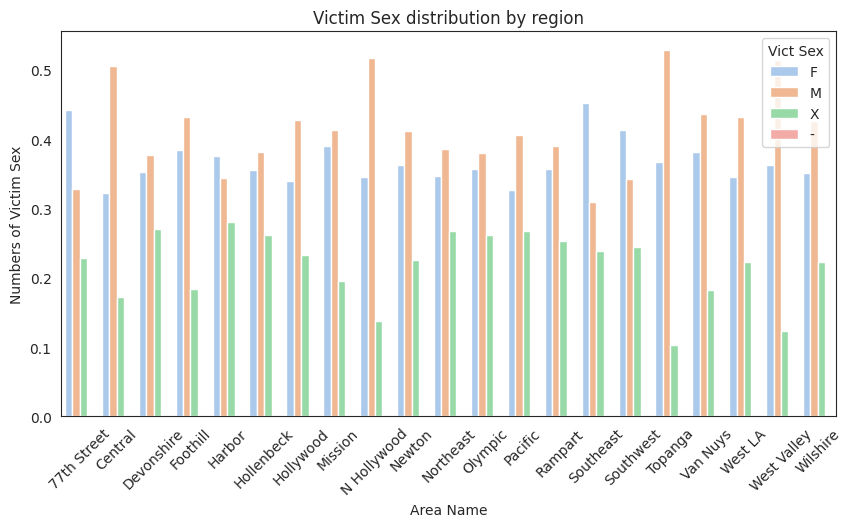

In [74]:
#the distribution of the Sex of the victim by region
# Get all regions from the dataset
regions = crime_data['area_name'].unique()

# Filter out unknown victim sexes and select only the desired regions
filtered_data = crime_data[(crime_data['area_name'].isin(regions)) & (~crime_data['vict_sex'].isin(['H']))]

# Group the data by region and victim sex, and calculate the counts and proportions
grouped_data = filtered_data.groupby(['area_name', 'vict_sex']).size().reset_index(name='counts')
grouped_data['prop'] = grouped_data.groupby('area_name')['counts'].apply(lambda x: x / x.sum())

# Plot the data using seaborn
plt.figure(figsize=(10, 5))
sns.barplot(x='area_name', y='prop', hue='vict_sex', data=grouped_data, palette='pastel')
plt.title('Victim Sex distribution by region')
plt.xlabel('Area Name')
plt.ylabel('Numbers of Victim Sex')
plt.legend(title='Vict Sex', loc='upper right')
plt.xticks(rotation=45)
plt.show()


### **the distribution of victim descent across different areas**

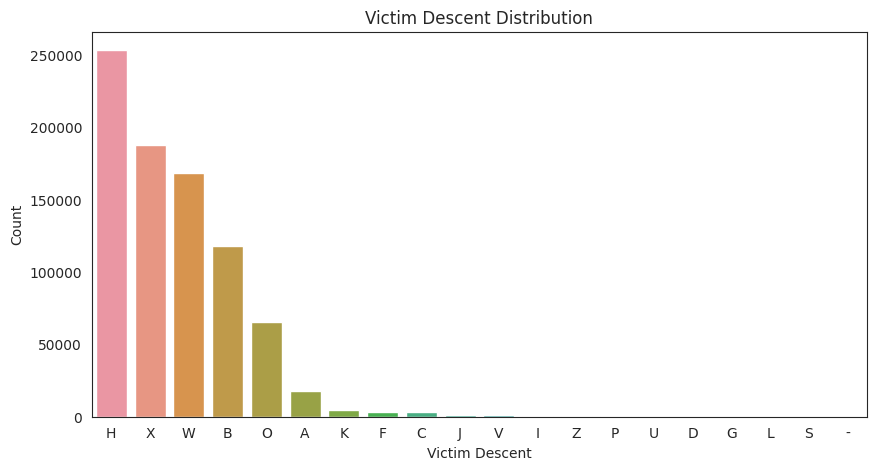

In [75]:
#Victim distribution in the dataset

plt.figure(figsize=(10, 5))

# Count the number of occurrences of each victim descent
counts = crime_data['vict_descent'].value_counts()

# Create a bar chart of the counts using seaborn
sns.barplot(x=counts.index, y=counts.values)

# Set the title and axis labels
plt.title('Victim Descent Distribution')
plt.xlabel('Victim Descent')
plt.ylabel('Count')

# Show the chart
plt.show()


In [ ]:
#Descent Code: A - Other Asian B - Black C - Chinese D - Cambodian
#F - Filipino G - Guamanian H - Hispanic/Latin/Mexican
#I - American Indian/Alaskan Native J - Japanese K - Korean
#L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian
#V - Vietnamese W - White X - Unknown Z - Asian Indian

### **the weapons used and the distribution across the data**

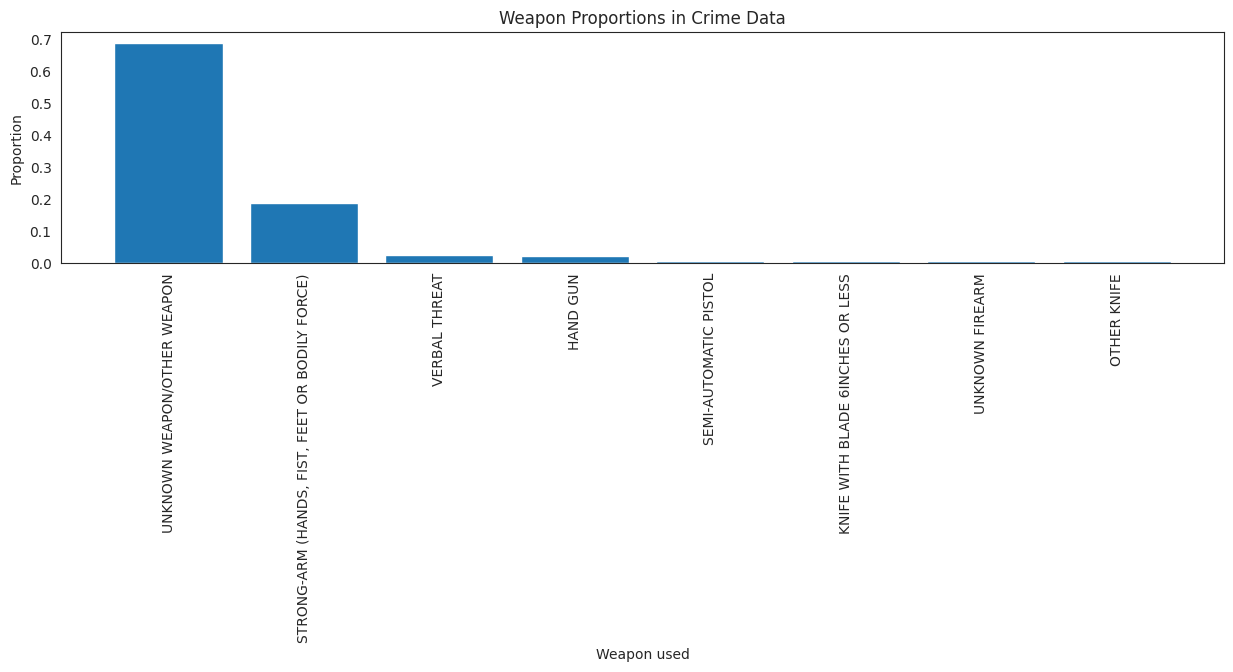

In [76]:
#proportion and types of weapon used
## Count the number of occurrences of each weapon description
weapon_counts = crime_data['weapon_desc'].value_counts()

# Calculate the proportion of each weapon description out of the total number of crimes
weapon_props = weapon_counts / sum(weapon_counts)

# Filter out any weapon descriptions that have a proportion less than 0.5%
weapon_props = weapon_props[weapon_props >= 0.005]

# Create a bar chart to show the proportion of different types of weapons used in crimes
plt.figure(figsize=(15, 3))
plt.bar(weapon_props.index, weapon_props)
plt.xticks(rotation=90)
plt.xlabel('Weapon used')
plt.ylabel('Proportion')
plt.title('Weapon Proportions in Crime Data')
plt.show()